# Lab 4: MLR & Outliers with Forestry Data (Python3)

In the computational section of this Lab you will consider the forestry dataset found in the file forestry.csv. This dataset records the needle area and several other variables for 35 coniferous trees. Specifically, the dataset contains observations from the following variables:

* area: the total needle area of the tree
* height: the height of the tree
* caliper: a measure of the tree’s trunk size
* htcal: the product of height and caliper (a measure of the tree’s trunk volume)

Interest lies developing a model that relates a tree’s total needle area to its caliper and its height. Your job in this Lab is to develop such a model by performing the tasks below. Where computation is required, you must perform the calculations in both R and Python.

In [46]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

data = pd.read_csv('forestry.csv')

(a) Fit a multiple linear regression model relating area to the three explanatory variables listed above and construct the following residual plots:
1. Studentized Residuals vs. Index
1. Studentized Residuals vs. Fitted Values
1. Histogram of Studentized Residuals
1. QQ-plot of Studentized Residuals

In [47]:
mlrModel1 = smf.ols('area ~ height + caliper + htcal', data = data).fit()
n = data.shape[0]
x1 = data['height']
x2 = data['caliper']
x3 = data['htcal']
X = np.array([np.repeat(1,n), x1, x2, x3]).T
H = np.matmul(np.matmul(X, np.linalg.inv(np.matmul(X.T, X))), X.T)
h = np.diag(H)
sigma_hat = np.sqrt(np.sum(mlrModel1.resid**2)/mlrModel1.df_resid)
st_res = mlrModel1.resid/(sigma_hat*np.sqrt(1-h))

(0, 36)

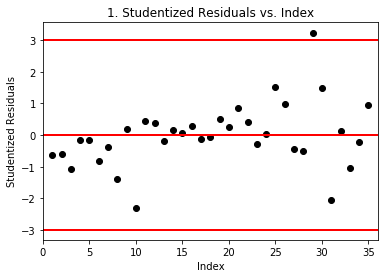

In [48]:
#Studentized Residuals vs. Index
n = len(st_res)
index = np.linspace(1,n,n)
plt.figure()
plt.scatter(x = index, y = st_res, color = "black")
plt.title("1. Studentized Residuals vs. Index")
plt.xlabel("Index")
plt.ylabel("Studentized Residuals")
plt.hlines(y = 0, xmin = 0, xmax = n+1, color = "red", linewidth = 2)
plt.hlines(y = 3, xmin = 0, xmax = n+1, color = "red", linewidth = 2)
plt.hlines(y = -3, xmin = 0, xmax = n+1, color = "red", linewidth = 2)
plt.xlim(0,n+1)

(11.625771928764799, 185.20982607241177)

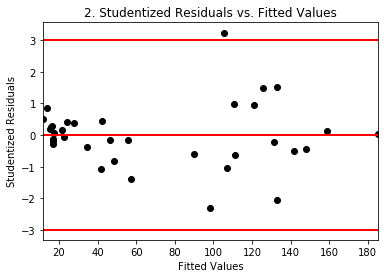

In [49]:
#Studentized Residuals vs. Fitted Values
plt.figure()
plt.scatter(x = mlrModel1.fittedvalues, y = st_res, color = "black")
plt.title("2. Studentized Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Studentized Residuals")
plt.hlines(y = 0, xmin = np.min(mlrModel1.fittedvalues), xmax = np.max(mlrModel1.fittedvalues), color = "red", linewidth = 2)
plt.hlines(y = 3, xmin = np.min(mlrModel1.fittedvalues), xmax = np.max(mlrModel1.fittedvalues), color = "red", linewidth = 2)
plt.hlines(y = -3, xmin = np.min(mlrModel1.fittedvalues), xmax = np.max(mlrModel1.fittedvalues), color = "red", linewidth = 2)
plt.xlim(np.min(mlrModel1.fittedvalues), np.max(mlrModel1.fittedvalues))

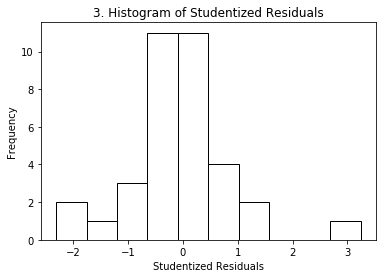

In [50]:
#Histogram of Studentized Residuals
plt.figure()
plt.hist(st_res, edgecolor = "black", color = "white")
plt.title("3. Histogram of Studentized Residuals")
plt.xlabel("Studentized Residuals")
plt.ylabel("Frequency")

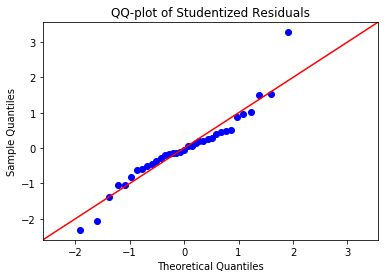

In [51]:
#QQ-plot of Studentized Residuals
sm.qqplot(st_res, stats.norm, fit = True, line = '45')
plt.title("QQ-plot of Studentized Residuals")

(b) Based on the plots in (a), answer “Yes” or “No” to the following questions and give a one sentence justification.

Q1. Do the residuals appear to be independent?

No, in the Studentized Residuals vs. Index plot we see the points create a "bow tie" pattern instead of the points being randomly scattered.

Q2. Do the residuals appear to have constant variance?

No, in the Studentized Residuals vs. Fitted Values plot we see that as the fitted values grow larger, the variability in the residuals increases as well.

Q3. Do the residuals appear to be normally distributed?

No, in the plots above we can see that the residuals seem to be left skewed (excluding the one residual that is extremely larger that the other, may be a possible outlier).

Q4. Do the residuals suggest the existence of an outlier?

Yes, in the plots above as I previously mentioned there seems to be one residual that is extremely larger making it substantilly different than the rest.

(c) Which observation has the largest Studentized residual?

In [52]:
np.where(st_res == np.max(st_res))[0][0] + 1

29

The 29th observation has the largest studentized residual.

(d) Calculate the leverage for each observation and construct a plot of them vs. their index. Which observations have ‘high’ leverage (i.e., leverage larger than twice the average leverage)?

array([ 1,  2, 24, 32])

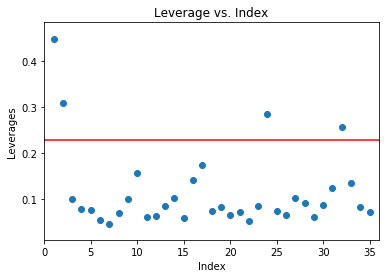

In [53]:
plt.scatter(x = index, y = h)
plt.title("Leverage vs. Index")
plt.xlabel("Index")
plt.ylabel("Leverages")
plt.hlines(y = 2*np.mean(h), xmin = 0, xmax = n+1, colors = "red")
plt.xlim(0,n+1)
np.where(h > 2*np.mean(h))[0] + 1

In the plot, Leverage vs. Index, we see that there are four points (1, 2, 24, and 32) that have a high leverage, meaning that there leverage is 2x the average leverage.

(e) Calculate Cook’s D-statistic for each observation and construct a plot of them vs. their index. List the top three most influential points.

array([10, 29, 31])

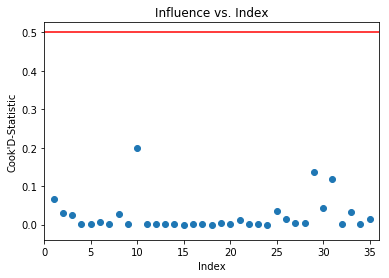

In [54]:
p = data.shape[1]
cook_d = (h*st_res**2)/((1-h)*(p+1))
plt.scatter(x = index, y = cook_d)
plt.title("Influence vs. Index")
plt.xlabel("Index")
plt.ylabel("Cook'D-Statistic")
plt.hlines(y = 0.5, xmin = 0, xmax = n+1, colors = "red")
plt.xlim(0,n+1)
np.where(cook_d > 0.1)[0] + 1

Top 3 most influential points: 10, 29, and 31.

(f) Repeat part (a) but with observations 10 and 29 deleted.

In [55]:
data2 = data.drop([9,28])
mlrModel2 = smf.ols('area ~ height + caliper + htcal', data = data2).fit()
n = data2.shape[0]
x1 = data2['height']
x2 = data2['caliper']
x3 = data2['htcal']
X = np.array([np.repeat(1,n), x1, x2, x3]).T
H = np.matmul(np.matmul(X, np.linalg.inv(np.matmul(X.T, X))), X.T)
h = np.diag(H)
sigma_hat = np.sqrt(np.sum(mlrModel2.resid**2)/mlrModel2.df_resid)
st_res = mlrModel2.resid/(sigma_hat*np.sqrt(1-h))

(0, 34)

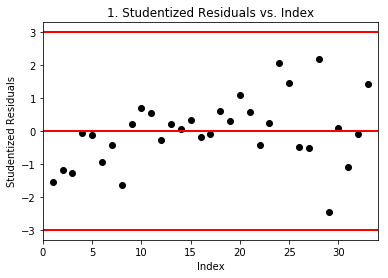

In [56]:
#Studentized Residuals vs. Index
n = len(st_res)
index = np.linspace(1,n,n)
plt.figure()
plt.scatter(x = index, y = st_res, color = "black")
plt.xlabel("Index")
plt.ylabel("Studentized Residuals")
plt.title("1. Studentized Residuals vs. Index")
plt.hlines(y = 0, xmin = 0, xmax = n+1, color = "red", linewidth = 2)
plt.hlines(y = 3, xmin = 0, xmax = n+1, color = "red", linewidth = 2)
plt.hlines(y = -3, xmin = 0, xmax = n+1, color = "red", linewidth = 2)
plt.xlim(0,n+1)

(12.42456479726517, 182.83037708140586)

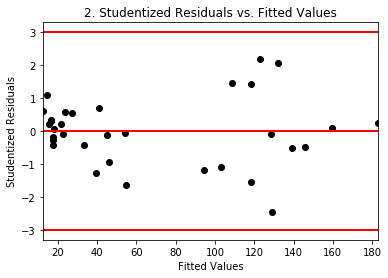

In [57]:
#Studentized Residuals vs. Fitted Values
plt.figure()
plt.scatter(x = mlrModel2.fittedvalues, y = st_res, color = "black")
plt.xlabel("Fitted Values")
plt.ylabel("Studentized Residuals")
plt.title("2. Studentized Residuals vs. Fitted Values")
plt.hlines(y = 0, xmin = np.min(mlrModel2.fittedvalues), xmax = np.max(mlrModel2.fittedvalues), color = "red", linewidth = 2)
plt.hlines(y = 3, xmin = np.min(mlrModel2.fittedvalues), xmax = np.max(mlrModel2.fittedvalues), color = "red", linewidth = 2)
plt.hlines(y = -3, xmin = np.min(mlrModel2.fittedvalues), xmax = np.max(mlrModel2.fittedvalues), color = "red", linewidth = 2)
plt.xlim(np.min(mlrModel2.fittedvalues), np.max(mlrModel2.fittedvalues))

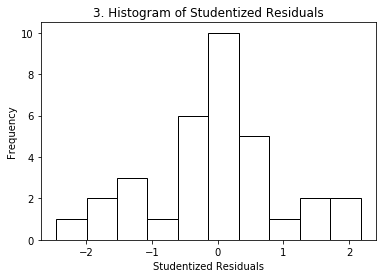

In [58]:
#Histogram of Studentized Residuals
plt.figure()
plt.hist(st_res, edgecolor = "black", color = "white")
plt.title("3. Histogram of Studentized Residuals")
plt.xlabel("Studentized Residuals")
plt.ylabel("Frequency")

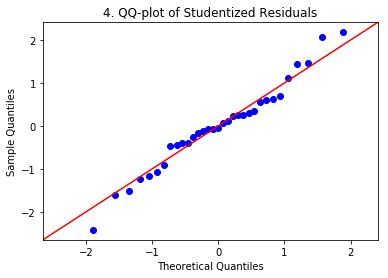

In [59]:
#QQ-plot of Studentized Residuals
sm.qqplot(st_res, stats.norm, fit = True, line = '45')
plt.title("4. QQ-plot of Studentized Residuals")

(g) Consider the plot of the Studentized Residuals vs. Fitted Values from (f). Do these residuals appear to have constant variance? Answer “Yes” or “No” with a one sentence justification.

No, despite the outlier being removed we can still see that as the fitted values grow larger, the variability in the residuals increases as well.

(h) Fit a multiple linear regression model relating log(area) (i.e., the natural logarithm of area) to the three explanatory variables, excluding observations 10 and 29 as you did in (f).

In [60]:
y_log = np.log(data2['area'])
mlrModel3 = smf.ols('y_log ~ x1 + x2 + x3', data = data2).fit()

(i) Construct a plot of the Studentized Residuals vs. Fitted Values for the model in (h). Does it appear as though the log-transformation has stabilized the variability of the residuals relative to what was observed in (g)? Which model – the one from (g) or the one from (h) – do you feel is most appropriate?

In [61]:
sigma_hat = np.sqrt(np.sum(mlrModel3.resid**2)/mlrModel3.df_resid)
st_res = mlrModel3.resid/(sigma_hat*np.sqrt(1-h))

(2.7113607641308333, 5.305713570628743)

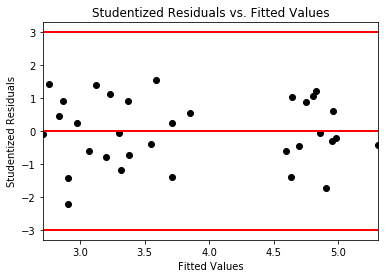

In [62]:
#Studentized Residuals vs. Fitted Values
plt.scatter(x = mlrModel3.fittedvalues, y = st_res, color = "black")
plt.title("Studentized Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Studentized Residuals")
plt.hlines(y = 0, xmin = np.min(mlrModel3.fittedvalues), xmax = np.max(mlrModel3.fittedvalues), color = "red", linewidth = 2)
plt.hlines(y = 3, xmin = np.min(mlrModel3.fittedvalues), xmax = np.max(mlrModel3.fittedvalues), color = "red", linewidth = 2)
plt.hlines(y = -3, xmin = np.min(mlrModel3.fittedvalues), xmax = np.max(mlrModel3.fittedvalues), color = "red", linewidth = 2)
plt.xlim(np.min(mlrModel3.fittedvalues), np.max(mlrModel3.fittedvalues))

Yes, it appears as though the log-transformation has stabilized the variability of the residuals relative to what was previously observed in (g). Thus, the model that is most appropriate would be the (h) the log-transforamtion response  since the constant variance assumption is valid for this model unlike in the model for (g).